In [422]:
###this week let's import the data and explore the parameter space 
###for a linear regression model 
#uncomment lines with a single "#" to see the output
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [423]:
#####   PART 1: IMPORT, SORT and FILTER DATA #####
###import data and convert dates to datetime format
df=pd.read_csv('WaterQualityWaterQualityStation.csv')
df['SampleDate']=pd.to_datetime(df.SampleDate)
#df.SampleDate.head()

In [529]:
###sort by ascending sample date
df=df.sort_values(by=['SampleDate','Depth'])
###filter to only use july samples in the analysis 
df_filtered=df.query('SampleDate.dt.month==7')
###keep oxygen and salinity 
oxygen_df=df_filtered[df_filtered['Parameter'].str.match('DO')]
salt_df=df_filtered[df_filtered['Parameter'].str.match('SALINITY')]
###check that the sample dates and depths match up 
o2_list = oxygen_df[['SampleDate','Depth']]
salt_list = salt_df[['SampleDate','Depth']]
check=(o2_list.reset_index()==salt_list.reset_index())
check.SampleDate.value_counts(),check.Depth.value_counts()

(True    155
 Name: SampleDate, dtype: int64, True    155
 Name: Depth, dtype: int64)

In [530]:
###keep just the values
oxygen=oxygen_df.MeasureValue.to_numpy()
salt=salt_df.MeasureValue.to_numpy()
salt.shape, oxygen.shape 

((155,), (155,))

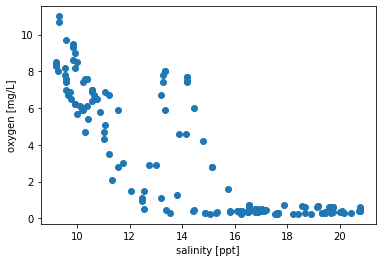

In [531]:
#####   PART 2: PLOTTING #####
###make a scatter plot to look at the data
plt.plot(salt,oxygen,'o')
plt.xlabel('salinity [ppt]')
plt.ylabel('oxygen [mg/L]')
plt.show()

In [532]:
#####   PART 3: COST and GRADIENT DESCENT #####

###in this example, salinity is our input variable "X"
###and oxygen is our output or target variable "y"
m=np.size(oxygen)
y=oxygen
X=np.column_stack((np.ones(m),salt)) #Add a column of ones to x
theta=np.zeros((2, 1)) # initialize fitting parameters

In [533]:
### build and test the cost function 
J=0 

def computeCost(X, y, theta):
    var=np.zeros(m)
    for i in range(0,m):
        var[i]=(np.dot(theta.T,X[i,:])-y[i])**2  
    return (1/(2*m))*np.sum(var)

print('Testing the cost function ...\n')
### compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = ', J)

### further testing of the cost function
J = computeCost(X, y, np.array([[4], [0]]));
print('\nWith theta = [4 ; 0]\nCost computed = ', J)

### further testing of the cost function
J = computeCost(X, y, np.array([[15], [-.75]]));
print('\nWith theta = [15 ; -.75]\nCost computed = ', J)

### further testing of the cost function
J = computeCost(X, y, np.array([[10], [-.5]]));
print('\nWith theta = [10 ; -.5]\nCost computed = ', J)

Testing the cost function ...

With theta = [0 ; 0]
Cost computed =  11.246900322580647

With theta = [4 ; 0]
Cost computed =  5.848964838709677

With theta = [15 ; -.75]
Cost computed =  2.04504247983871

With theta = [10 ; -.5]
Cost computed =  2.3284250806451614


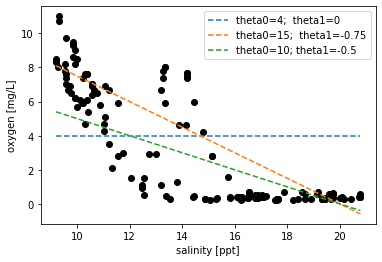

In [534]:
### let's plot some of these tests 
theta0=[4, 15, 10]
theta1=[0, -.75, -.5]

x_hyp=np.linspace(np.min(salt),np.max(salt),100)

###calculate the values for our three hypotheses 
h_0=theta0[0]+theta1[0]*x_hyp
h_1=theta0[1]+theta1[1]*x_hyp
h_2=theta0[2]+theta1[2]*x_hyp

plt.plot(salt,oxygen,'ko')
plt.xlabel('salinity [ppt]')
plt.ylabel('oxygen [mg/L]')
plt.plot(x_hyp,h_0,'--',label='theta0=4;  theta1=0')
plt.plot(x_hyp,h_1,'--',label='theta0=15;  theta1=-0.75')
plt.plot(x_hyp,h_2,'--',label='theta0=10; theta1=-0.5')
plt.legend()
plt.show()

Theta found by gradient descent:
 [[11.95923455]
 [-0.6055514 ]]


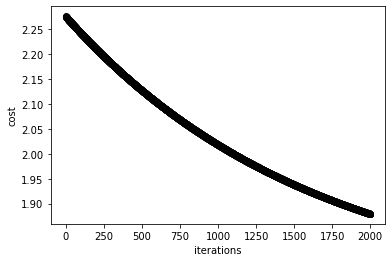

In [542]:
### gradient descent settings
iterations=2000;
alpha=.005;

### initialize theta with our best guess from before
theta=np.array([[10], [-.5]])
               
### build the gradient descent function 
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history=np.zeros(num_iters)
    var1=np.zeros(m)
    var2=np.zeros(m)
    for num_iters in range (0,num_iters):      
        for i in range (0,m):
            var1[i]=(np.dot(theta.T,X[i,:])-y[i])*X[i,0]
            var2[i]=(np.dot(theta.T,X[i,:])-y[i])*X[i,1] 
        theta_0=theta[0,0]-alpha*(1/m)*sum(var1)
        theta_1=theta[1,0]-alpha*(1/m)*sum(var2) 
        theta=np.array([[theta_0], [theta_1]])
        J_history[num_iters]=computeCost(X, y, theta)
    return theta, J_history

### run the gradient descent function 
theta_Jhis=gradientDescent(X, y, theta, alpha, iterations)
theta_gd=theta_Jhis[0]
J_history=theta_Jhis[1]

### print theta to screen
print('Theta found by gradient descent:\n', theta_gd)

### plot the cost function history 
plt.plot(np.arange(0,iterations),J_history,'ko')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

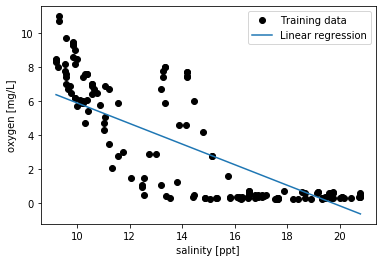

In [543]:
### Some troubleshooting is required, but let's see the solution so far 
### Plot the linear fit
h_gd=theta_gd[0]+theta_gd[1]*x_hyp

plt.plot(salt,oxygen,'ko',label='Training data')
plt.xlabel('salinity [ppt]')
plt.ylabel('oxygen [mg/L]')
plt.plot(x_hyp,h_gd,label='Linear regression')
plt.legend()
plt.show()

In [544]:
### Predict values for salinity 15 and 22 
predict1=[1, 15]*theta_gd.T;
print('For salinity=15, we predict a dissolved oxygen of \n', np.sum(predict1))
predict2=[1, 20]*theta_gd.T;
print('For salinity=20, we predict a dissolved oxygen of \n', np.sum(predict2))

For salinity=15, we predict a dissolved oxygen of 
 2.8759635839295523
For salinity=20, we predict a dissolved oxygen of 
 -0.15179340578720968


In [562]:
#####   PART 4: VISUALIZING THE COST FUNCTION #####
###Grid over which we will calculate J
theta0_vals=np.linspace(8,13,100)
theta1_vals=np.linspace(-.75,-.25,100)
#(X_theta0, Y_theta1) = np.meshgrid(theta0_vals, theta1_vals)

###initialize J_vals to a matrix of 0's
J_vals=np.zeros((theta0_vals.size,theta1_vals.size))

###Fill out J_vals
for i in range(0,theta0_vals.size):
    for j in range(0,theta1_vals.size):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]]);
        J_vals[i,j] = computeCost(X, y, t)

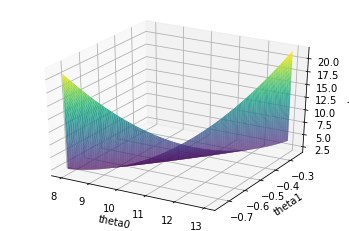

In [563]:
#surface plot 
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')
plt.show()

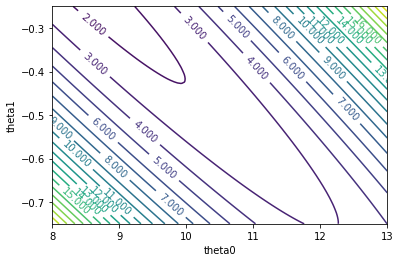

In [564]:
#contour plot
import matplotlib.cm as cm
fig, ax = plt.subplots()
CS = ax.contour(theta0_vals, theta1_vals, J_vals, 20)
ax.clabel(CS, fontsize=10)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
plt.show()